In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [2]:
data =  pd.read_csv('Train.csv')

In [3]:

data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
data.shape

(10999, 12)

In [6]:
data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

ValueError: could not convert string to float: 'D'

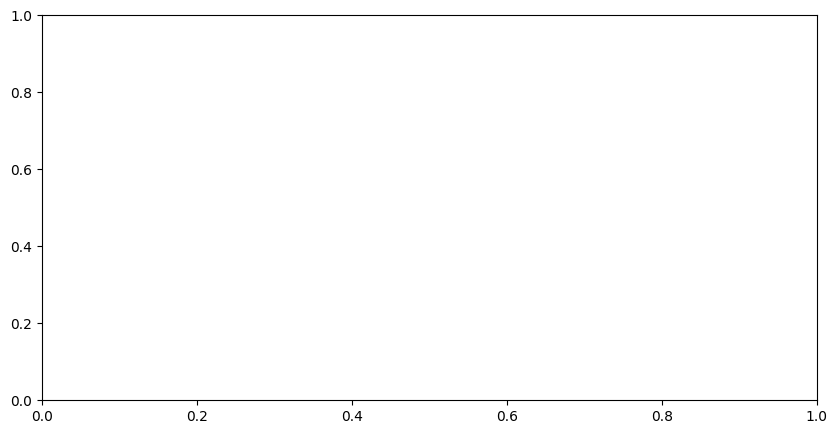

In [11]:
f,ax=plt.subplots(figsize=(10,5))
sns.heatmap(data.corr(), annot = True)

In [15]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [14]:
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


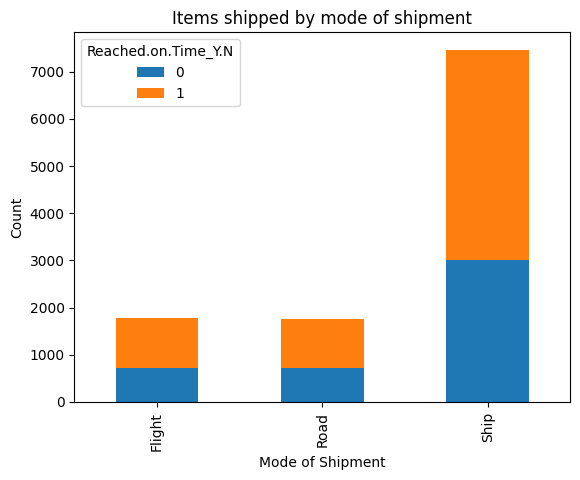

In [24]:
grouped = data.groupby(['Mode_of_Shipment','Reached.on.Time_Y.N']).size().unstack()
grouped.plot(kind = 'bar', stacked = True)
plt.xlabel('Mode of Shipment')
plt.ylabel('Count')
plt.title('Items shipped by mode of shipment')
plt.show()

<Axes: xlabel='Product_importance', ylabel='count'>

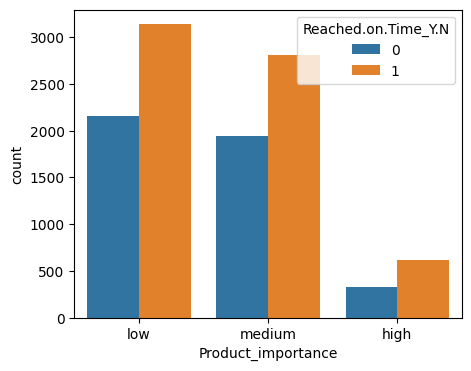

In [28]:
plt.figure(figsize=(5,4))
sns.countplot(x='Product_importance',hue='Reached.on.Time_Y.N', data=data)

<Axes: xlabel='Customer_care_calls', ylabel='count'>

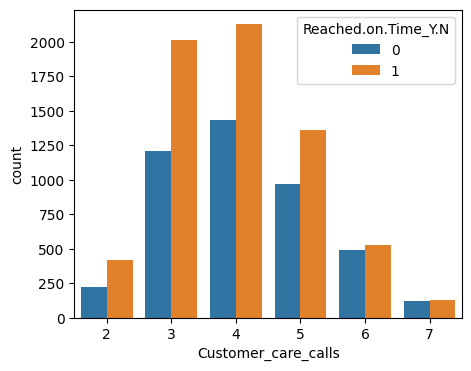

In [29]:
plt.figure(figsize=(5,4))
sns.countplot(x='Customer_care_calls',hue='Reached.on.Time_Y.N', data=data)

##Label Encoding the cATEGORICAL functionality

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

In [34]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1


In [35]:
data =  data.drop(['ID','Gender'], axis=1)
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3,1,44,1233,1
1,4,0,4,5,216,2,1,59,3088,1
2,0,0,2,2,183,4,1,48,3374,1
3,1,0,3,3,176,4,2,10,1177,1
4,2,0,2,2,184,3,2,46,2484,1


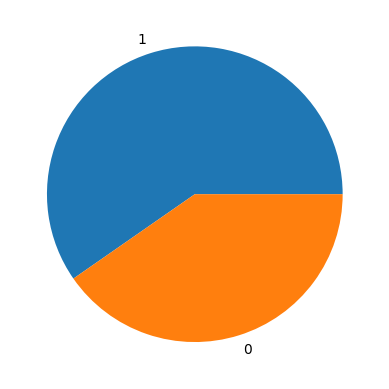

In [43]:
risk_count  =  data['Reached.on.Time_Y.N'].value_counts()
plt.pie(risk_count.values, labels=risk_count.index)
plt.show()

In [44]:
x= data.drop(['Reached.on.Time_Y.N'],axis=1)
y = data['Reached.on.Time_Y.N']

In [47]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
x_scale = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
print(x_scale)

       Warehouse_block  Mode_of_Shipment  Customer_care_calls  \
0             0.447189         -2.004158            -0.047711   
1             1.118034         -2.004158            -0.047711   
2            -1.565345         -2.004158            -1.799887   
3            -0.894500         -2.004158            -0.923799   
4            -0.223656         -2.004158            -1.799887   
...                ...               ...                  ...   
10994        -1.565345          0.638342            -0.047711   
10995        -0.894500          0.638342            -0.047711   
10996        -0.223656          0.638342             0.828377   
10997         1.118034          0.638342             0.828377   
10998         0.447189          0.638342            -1.799887   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
0            -0.700755            -0.690722        -0.372735   
1             1.421578             0.120746        -1.029424   
2            -0.700755     

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import class_weight

In [50]:
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=.30)
class_weight =  class_weight.compute_class_weight('balanced', classes=np.unique(y_train),y=y_train)
class_weight_dict = dict(enumerate(class_weight))

In [51]:
print(class_weight_dict)

{0: 1.2365884998393832, 1: 0.8394025294374182}


In [63]:
from sklearn.utils.class_weight import compute_sample_weight

# Compute the sample weights based on the training labels
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Now train the model using sample weights
gbc_model = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.02,
    max_depth=3,
    min_samples_leaf=1,
    min_samples_split=2,
    subsample=1.0,
    random_state=42
)

gbc_model.fit(x_train, y_train, sample_weight=sample_weights)

# Predict and evaluate
y_train_pred_gbc = gbc_model.predict(x_train)
y_test_pred_gbc = gbc_model.predict(x_test)

from sklearn.metrics import accuracy_score

train_accuracy_gbc = accuracy_score(y_train, y_train_pred_gbc)
test_accuracy_gbc = accuracy_score(y_test, y_test_pred_gbc)

print("Training Accuracy:", train_accuracy_gbc)
print("Test Accuracy:", test_accuracy_gbc)


Training Accuracy: 0.7007403558903754
Test Accuracy: 0.6790909090909091


## ADA BOOST CLASSIFIER

In [65]:
from sklearn.ensemble import AdaBoostClassifier


In [1]:
from sklearn.utils.class_weight import compute_sample_weight

# Compute the sample weights based on the training labels
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Now train the model using sample weights
Ada_boost = AdaBoostClassifier(
    n_estimators=500,
    learning_rate=0.02,
    random_state=42,
    # base_estimator=DeprecationWarning
)

Ada_boost.fit(x_train, y_train, sample_weight=sample_weights)

# Predict and evaluate
y_train_pred_gbc = Ada_boost.predict(x_train)
y_test_pred_gbc = Ada_boost.predict(x_test)

from sklearn.metrics import accuracy_score

train_accuracy_gbc = accuracy_score(y_train, y_train_pred_gbc)
test_accuracy_gbc = accuracy_score(y_test, y_test_pred_gbc)

print("Training Accuracy:", train_accuracy_gbc)
print("Test Accuracy:", test_accuracy_gbc)


NameError: name 'y_train' is not defined